In [174]:
# https://github.com/HIPS/autograd/blob/master/docs/tutorial.md

import autograd.numpy as np       # wrapped numpy
import matplotlib.pyplot as plt
import GPy 

from autograd import grad
from autograd import elementwise_grad as egrad


# Orthonormal basis for $L_2(\mathbb{R}^n, \mu)$

## Hermite polynomials 

- $\mu = $ Gaussian measure
- $k = RBF$ 

In [177]:
def exp2(x):
    y = np.exp(-x**2)
    return(y)

def hPoly(x, k):
    gradF = exp2
    for i in np.arange(1, k+1):
        gradF = egrad(gradF)
    y = (-1)**k *  np.exp(x**2) * gradF(x)
    return(y)

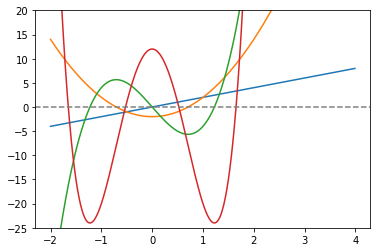

In [191]:
x = np.arange(-2, 4, 0.01)

order = 4
for k in range(1, order + 1):
    y = hPoly(x, k)
    plt.plot(x, y)
    
plt.ylim(-25, 20)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.show()